####Import the basic libraries

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt

#### This section, we use the mnist dataset from Keras to build the deep learning model. Firstly, we import dataset from tensorflow.keras.datasets.

In [2]:
# imports  mnist dataset 
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#### Data visualization by Matplotlib.

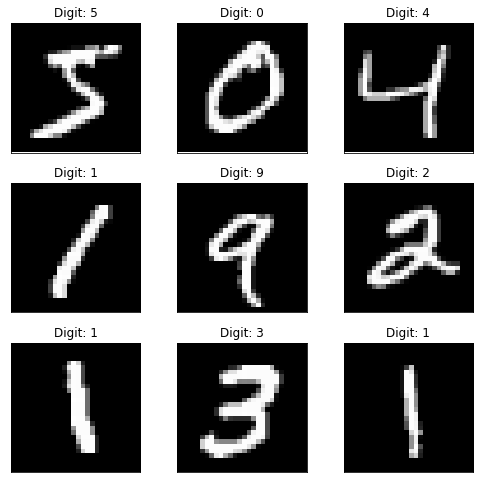

In [3]:
#plot mnist dataset
plt.figure(figsize=(7, 7))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])


In [4]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


####Before building the deep learnig model, we first do data preprocessing on training images.
####- reshape the dataset to 28*28
####- transform to float32
####- scale to range of 0-1


In [5]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (60000, 28, 28, 1)
Test matrix shape (10000, 28, 28, 1)


####We observe the targets (0-9). we applied one-hot-encoding to due with multi class problem using "from tensorflow.keras.utils import to_categorical".

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
from tensorflow.keras.utils import to_categorical
#one-hot encode target column
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
for i in range(5):
  print(y_train[i],y_train_cat[i])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


#### Design the archetecture of the deep learning model which consists of Dense, Conv2D, MaxPooling, and Flatten.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten

#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 64)                5

#### Compile and train the model using accuracy and categorical crossentropy to measure model performance

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
#train the model
history = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat),batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 17s 7ms/step - loss: 0.1814 - accuracy: 0.9461 - val_loss: 0.0533 - val_accuracy: 0.9827
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0557 - accuracy: 0.9824 - val_loss: 0.0457 - val_accuracy: 0.9848
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0405 - accuracy: 0.9876 - val_loss: 0.0485 - val_accuracy: 0.9850
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0314 - accuracy: 0.9899 - val_loss: 0.0303 - val_accuracy: 0.9896
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0249 - accuracy: 0.9921 - val_loss: 0.0318 - val_accuracy: 0.9902
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0225 - accuracy: 0.9927 - val_loss: 0.0351 - val_accuracy: 0.9890
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0158 - accuracy: 0.9948 - val_loss: 0.0437 - val_accuracy: 0.9865
Epoch

In [12]:
score = model.evaluate(X_test, y_test_cat, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.04059061408042908
Test accuracy: 0.9890000224113464


#### Plot the accuracy and the loss of the model between training set and validating set.

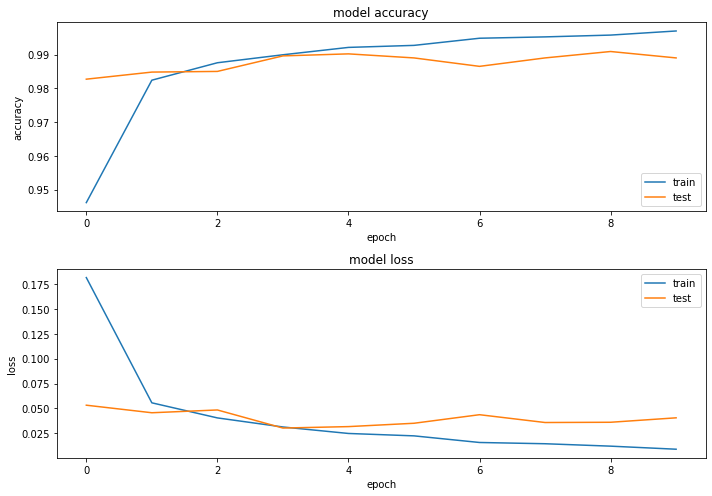

In [13]:
# plotting the metrics
plt.figure(figsize=(10, 7))
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()


In [14]:
#Predictions on the test set
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(predicted_classes,axis=1)

313/313 [==============================] - 1s 2ms/step


In [15]:

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")



9890  classified correctly
110  classified incorrectly


#### Show the right and wrong prediction by Matplotlib

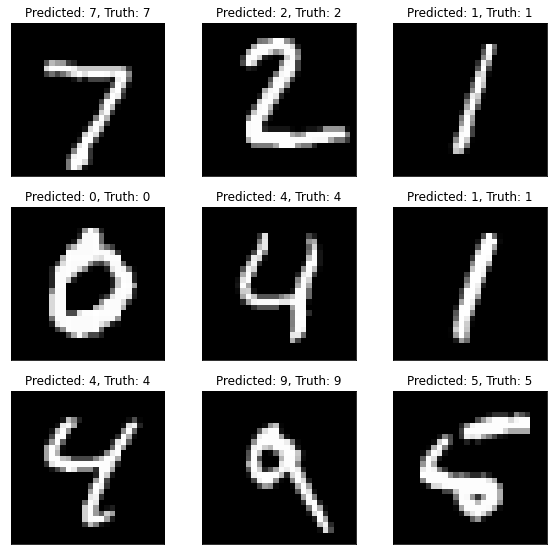

In [16]:
# plot 9 correct predictions
#fig = plt.figure(figsize=(12, 12))
plt.figure(figsize=(8, 8))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])
#fig


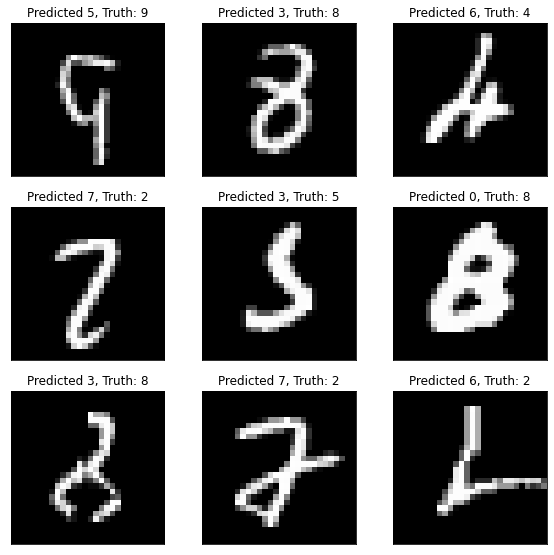

In [17]:
#plot 9 incorrect predictions
plt.figure(figsize=(8, 8))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])


#### Show the classification report (precision, recall and f1-score) and confusion matrix.

In [18]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=predicted_classes))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test, y_pred=predicted_classes))

Classification report 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion matrix 
[[ 978    0    0    0    0    1    0    1    0    0]
 [   0 1133    0    1    0    0    0    1    0    0]
 [   3    1 1019    3    1    0    1    4    0    0]
 [   0    0    0 1008    0    1    0    1

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

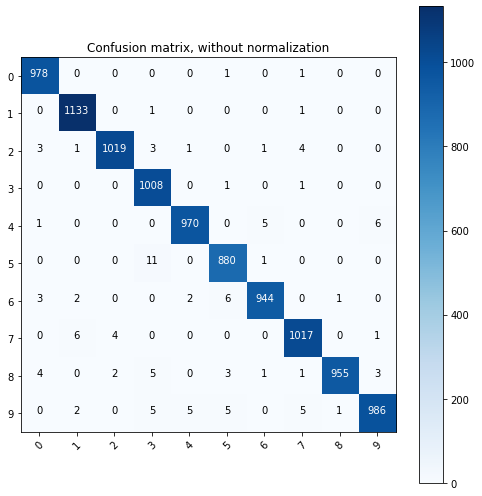

In [19]:
# Compute confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix\n============================")
  else:
    print('Confusion matrix, without normalization\n============================')
  # print(cm)
  # print("\n")

  plt.figure(figsize=(7,7))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  
class_names = list(set(y_test))
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=predicted_classes)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')